In [13]:
import numpy as np
from numpy import genfromtxt
from sklearn import linear_model
import matplotlib.pyplot as plt

In [14]:
# 读入数据 
data = genfromtxt(r"longley.csv",delimiter=',')
print(data)

[[     nan      nan      nan      nan      nan      nan      nan      nan]
 [     nan   83.     234.289  235.6    159.     107.608 1947.      60.323]
 [     nan   88.5    259.426  232.5    145.6    108.632 1948.      61.122]
 [     nan   88.2    258.054  368.2    161.6    109.773 1949.      60.171]
 [     nan   89.5    284.599  335.1    165.     110.929 1950.      61.187]
 [     nan   96.2    328.975  209.9    309.9    112.075 1951.      63.221]
 [     nan   98.1    346.999  193.2    359.4    113.27  1952.      63.639]
 [     nan   99.     365.385  187.     354.7    115.094 1953.      64.989]
 [     nan  100.     363.112  357.8    335.     116.219 1954.      63.761]
 [     nan  101.2    397.469  290.4    304.8    117.388 1955.      66.019]
 [     nan  104.6    419.18   282.2    285.7    118.734 1956.      67.857]
 [     nan  108.4    442.769  293.6    279.8    120.445 1957.      68.169]
 [     nan  110.8    444.546  468.1    263.7    121.95  1958.      66.513]
 [     nan  112.6    482.

In [15]:
# 切分数据
x_data = data[1:,2:]
y_data = data[1:,1]
print(x_data)
print(y_data)

[[ 234.289  235.6    159.     107.608 1947.      60.323]
 [ 259.426  232.5    145.6    108.632 1948.      61.122]
 [ 258.054  368.2    161.6    109.773 1949.      60.171]
 [ 284.599  335.1    165.     110.929 1950.      61.187]
 [ 328.975  209.9    309.9    112.075 1951.      63.221]
 [ 346.999  193.2    359.4    113.27  1952.      63.639]
 [ 365.385  187.     354.7    115.094 1953.      64.989]
 [ 363.112  357.8    335.     116.219 1954.      63.761]
 [ 397.469  290.4    304.8    117.388 1955.      66.019]
 [ 419.18   282.2    285.7    118.734 1956.      67.857]
 [ 442.769  293.6    279.8    120.445 1957.      68.169]
 [ 444.546  468.1    263.7    121.95  1958.      66.513]
 [ 482.704  381.3    255.2    123.366 1959.      68.655]
 [ 502.601  393.1    251.4    125.368 1960.      69.564]
 [ 518.173  480.6    257.2    127.852 1961.      69.331]
 [ 554.894  400.7    282.7    130.081 1962.      70.551]]
[ 83.   88.5  88.2  89.5  96.2  98.1  99.  100.  101.2 104.6 108.4 110.8
 112.6 114.2 1

In [16]:
# 创建模型
# 默认生成50个值,为岭回归系数
alphas_to_test = np.linspace(0.001, 1 ,100)
# 创建模型，保存误差值  Ridge岭回归 CV表示交叉验证
model = linear_model.RidgeCV(alphas=alphas_to_test, store_cv_values=True)
model.fit(x_data, y_data)

# 岭系数,选取50个最佳岭系数
print(model.alpha_)
# loss值  (交叉验证法误差)
print(model.cv_values_.shape)
print(model.cv_values_)

0.4046363636363637
(16, 100)
[[1.34072103 1.30506425 1.27614458 ... 1.65798751 1.66437849 1.67075134]
 [6.42617451 6.43102991 6.43592254 ... 6.75751399 6.7595723  6.76161178]
 [0.02634245 0.02644872 0.02649711 ... 0.00988797 0.0097733  0.00965991]
 ...
 [0.12399963 0.12080701 0.11814928 ... 0.13944863 0.13996759 0.14048624]
 [0.16413775 0.1764804  0.1867113  ... 0.1048936  0.10365605 0.10243065]
 [4.80718631 4.85974354 4.90829814 ... 6.70730901 6.71877092 6.73015939]]


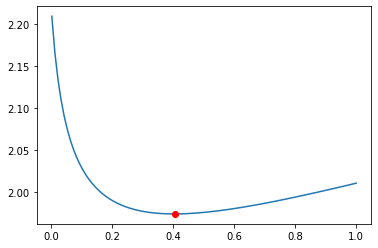

In [17]:
# 画图
# 岭系数跟loss值的关系,对16个样本求平均值
plt.plot(alphas_to_test, model.cv_values_.mean(axis=0))
# 选取的岭系数值的位置
plt.plot(model.alpha_, min(model.cv_values_.mean(axis=0)),'ro')
plt.show()

In [18]:
print(model.predict(x_data[2,np.newaxis]))

[88.11196241]
